In [2]:
import os
import sys
sys.path.append(os.path.dirname(os.getcwd()))

import numpy as np
import pandas as pd

from datafold.appfold import EDMD
from datafold.dynfold.transform import TSCPolynomialFeatures, TSCApplyLambdas
from datafold.pcfold import TSCDataFrame

import solvers
import utils
import generators

def get_torus_obs_krylov(initial_state=(0,0), num_col=500):
    return utils.generate_krylov(generators.two_torus_evolution_function, generators.two_torus_observable_func, initial_state, num_col)



Yt shape(500, 3)
G (13, 13)
A (13, 13)
K (13, 13)
Eigenvalue
[0.11+0.j   0.93-0.32j 0.94+0.31j 0.65+0.14j 0.69-0.17j 0.78+0.j
 0.83+0.02j 0.99+0.06j 0.99-0.06j 1.  +0.j   0.97-0.j   0.94+0.01j
 0.91-0.02j]


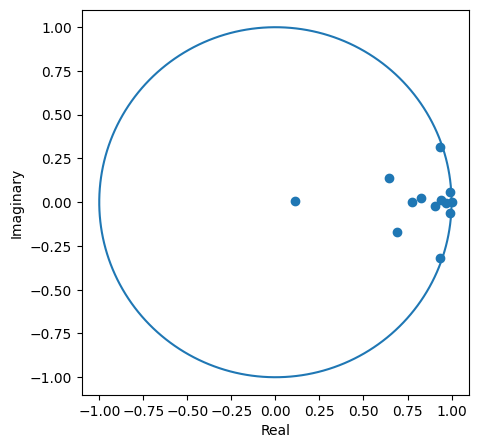

In [3]:
Yt = get_torus_obs_krylov()
print(f"Yt shape{Yt.shape}")
Ky = solvers.EDMD_matrix_representation(Yt, degree=5)
utils.round_complex_matrix(Ky)
utils.apply_arnoldi_and_plot(Ky, decimal=2)

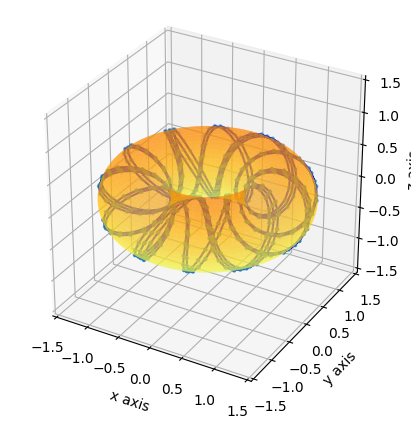

In [4]:
utils.plot_torus(Yt)

/Users/hajime/workspace/tum/Master's Thesis/venv/lib/python3.9/site-packages/pandas/core/generic.py:1899: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(self._values, dtype=dtype)
/Users/hajime/workspace/tum/Master's Thesis/venv/lib/python3.9/site-packages/datafold/dynfold/dmd.py:1187: UserWarning: Shift matrix (shape=(63, 63)) has not full rank (=6), falling back to least squares solution. The sum of residuals is: 0.0
  warnings.warn(


shape of Koopman matrix: 63 x 63


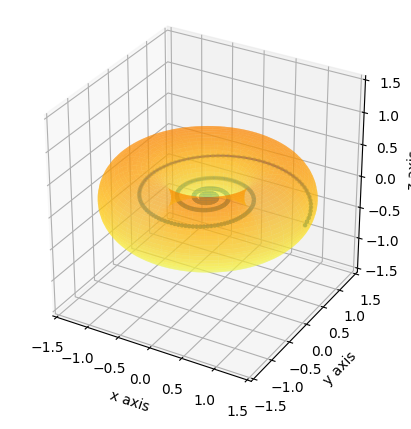

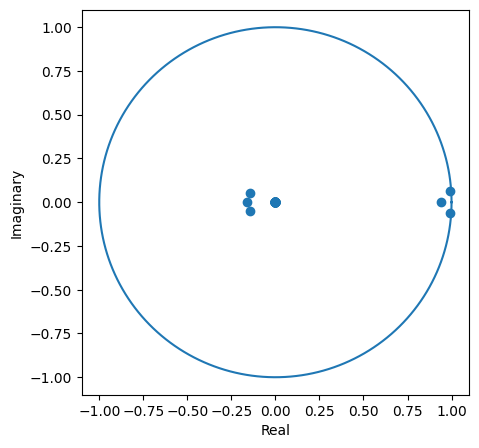

In [5]:
degree = 20
alpha = np.sqrt(2)

dict_step = [
    (
        "lambda",
        TSCApplyLambdas(lambdas=[lambda x: np.cos(alpha*k*x) + 1j * np.sin(alpha*k*x) for k in range(degree)]),
    )
]
K_df = pd.DataFrame(Yt)
tsc_data = TSCDataFrame.from_single_timeseries(K_df)

edmd_lambda = EDMD(dict_steps=dict_step, include_id_state=True).fit(X=tsc_data, dmd__store_system_matrix=True)
edmd_lambda_values = edmd_lambda.predict(tsc_data.initial_states())
len_koopman_matrix = len(edmd_lambda.named_steps["dmd"].eigenvectors_right_)
print(f"shape of Koopman matrix: {len_koopman_matrix} x {len_koopman_matrix}")
utils.plot_torus(edmd_lambda_values.values)
utils.plot_complex_on_unit_circle(edmd_lambda.named_steps["dmd"].eigenvalues_)

/Users/hajime/workspace/tum/Master's Thesis/venv/lib/python3.9/site-packages/datafold/dynfold/dmd.py:1169: UserWarning: There are more observables than snapshots. The current implementation favors more snapshots than obserables. This may result in a bad computational performance.
  warnings.warn(
/Users/hajime/workspace/tum/Master's Thesis/venv/lib/python3.9/site-packages/datafold/dynfold/dmd.py:1187: UserWarning: Shift matrix (shape=(1770, 1770)) has not full rank (=264), falling back to least squares solution. The sum of residuals is: 0.0
  warnings.warn(


shape of Koopman matrix: 1770 x 1770


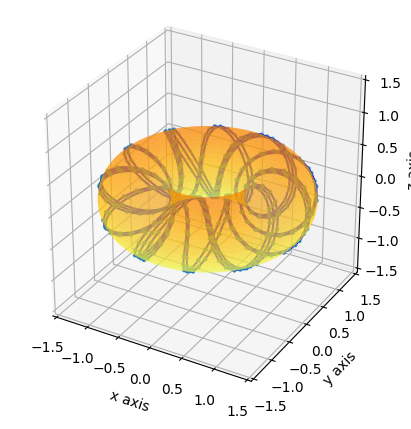

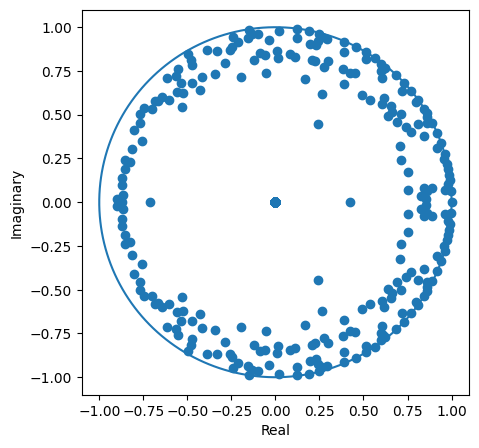

In [6]:
dict_step = [
    (
        "polynomial",
        TSCPolynomialFeatures(degree=degree),
    )
]
K_df = pd.DataFrame(Yt)
tsc_data = TSCDataFrame.from_single_timeseries(K_df)

edmd_poly = EDMD(dict_steps=dict_step, include_id_state=True).fit(X=tsc_data, dmd__store_system_matrix=True)
edmd_poly_values = edmd_poly.predict(tsc_data.initial_states())
len_koopman_matrix = len(edmd_poly.named_steps["dmd"].eigenvectors_right_)
print(f"shape of Koopman matrix: {len_koopman_matrix} x {len_koopman_matrix}")
utils.plot_torus(edmd_poly_values.values)
utils.plot_complex_on_unit_circle(edmd_poly.named_steps["dmd"].eigenvalues_)

G (16, 16)
A (16, 16)
K (16, 16)
Eigenvalue
[-0.26+0.j    0.18+0.j    0.94-0.33j  0.94+0.33j  0.7 -0.19j  0.64+0.14j
  0.72+0.12j  0.76-0.11j  0.78+0.j    0.83+0.01j  0.99-0.06j  0.99+0.06j
  0.93-0.03j  1.  +0.j    0.94+0.03j  0.97-0.j  ]


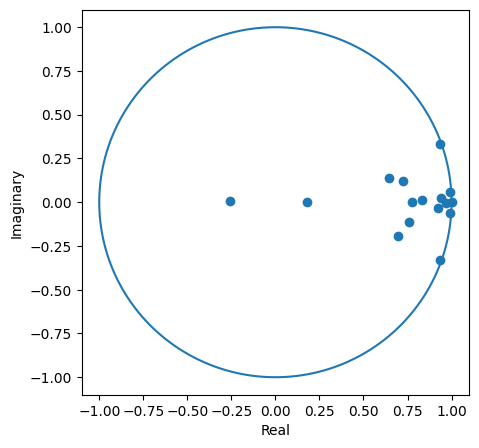

In [7]:
Ky = solvers.EDMD_matrix_representation(Yt, 6)
utils.round_complex_matrix(Ky)
utils.apply_arnoldi_and_plot(Ky, decimal=2)